In [1]:
from my_functions import read_obsfcstana

expt = 'DAv7_M36_ASCAT_type_13_ss_fp'

path = f'/discover/nobackup/amfox/Experiments/{expt}/{expt}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M08'
file_name_start = f'{expt}.ens_avg.ldas_ObsFcstAna.2015'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

In [2]:
import numpy as np

numobs = len(obs_obs[obs_species > 4])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[obs_species > 4]
obarray[:, 2] = obs_lat[obs_species > 4]
obarray[:, 0] = obs_obs[obs_species > 4]

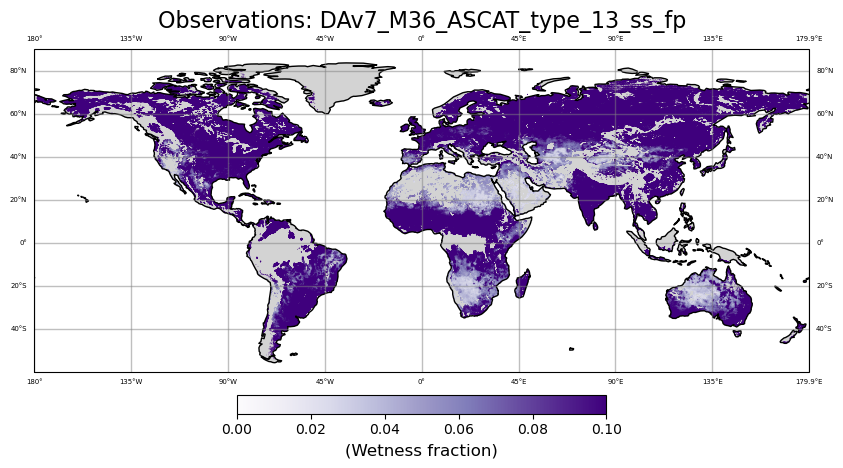

In [3]:
from mapper_functions import plot_global_tight

plot_global_tight(obarray,False,f'Observations: {expt}','(Wetness fraction)', 0, 0.1, cmap='Purples')

obarray2 = obarray

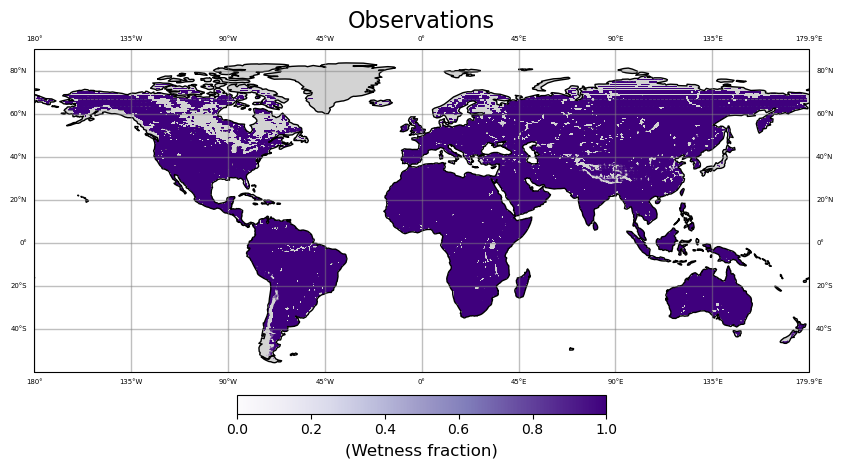

In [4]:
numobs = len(obs_obs[obs_species < 5])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[obs_species < 5]
obarray[:, 2] = obs_lat[obs_species < 5]
obarray[:, 0] = obs_obs[obs_species < 5]

plot_global_tight(obarray,False,'Observations','(Wetness fraction)', 0, 1.0, cmap='Purples')

 Saving figure as Observations: Combined mask.png 



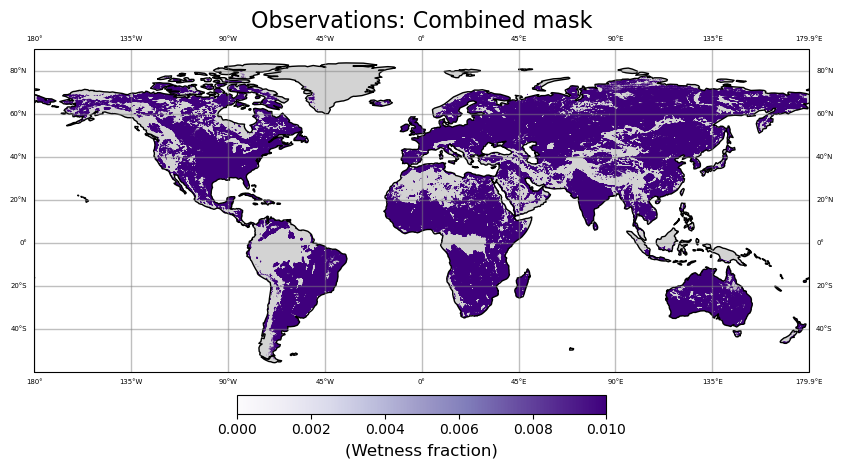

 Saving figure as Observations: Subsurface mask.png 



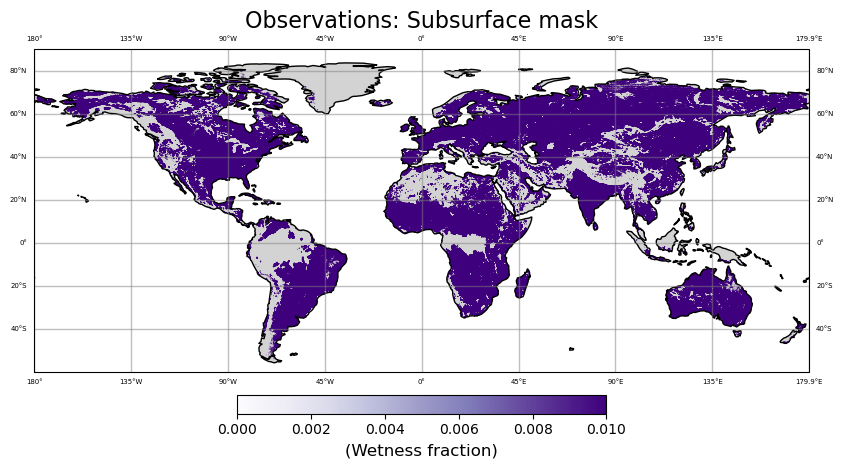

In [5]:
expt = 'DAv7_M36_ASCAT_type_13_comb_fp'

path = f'/discover/nobackup/amfox/Experiments/{expt}/{expt}/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M08'
file_name_start = f'{expt}.ens_avg.ldas_ObsFcstAna.2015'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

numobs = len(obs_obs[obs_species > 4])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[obs_species > 4]
obarray[:, 2] = obs_lat[obs_species > 4]
obarray[:, 0] = obs_obs[obs_species > 4]

plot_global_tight(obarray,True,'Observations: Combined mask','(Wetness fraction)', 0, 0.01, cmap='Purples')
plot_global_tight(obarray2,True,'Observations: Subsurface mask','(Wetness fraction)', 0, 0.01, cmap='Purples')

In [ ]:
numobs = len(obs_obs[obs_species < 5])
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon[obs_species < 5]
obarray[:, 2] = obs_lat[obs_species < 5]
obarray[:, 0] = obs_obs[obs_species < 5]

plot_global_tight(obarray,False,'Observations','(Wetness fraction)', 0, 1.0, cmap='Purples')

In [1]:
import xarray as xr
import numpy as np
from mapper_functions import plot_global
from mapper_functions import plot_global_tight

 Saving figure as ASCAT Mask Difference.png 



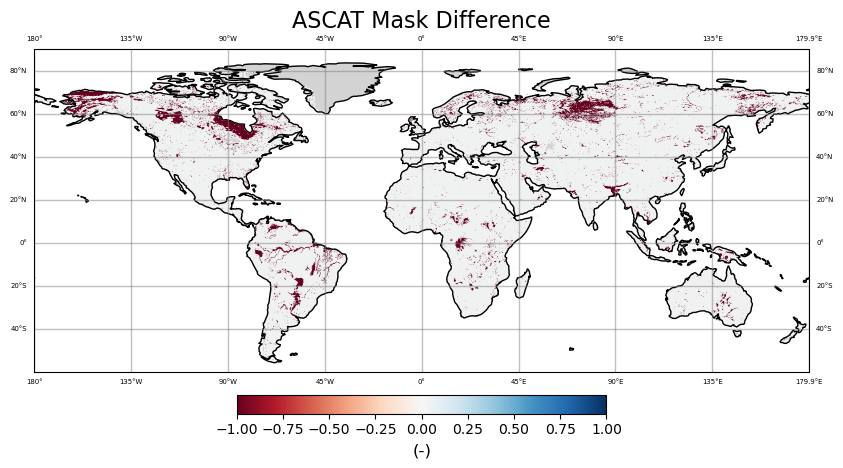

 Saving figure as ASCAT Subsurface mask.png 



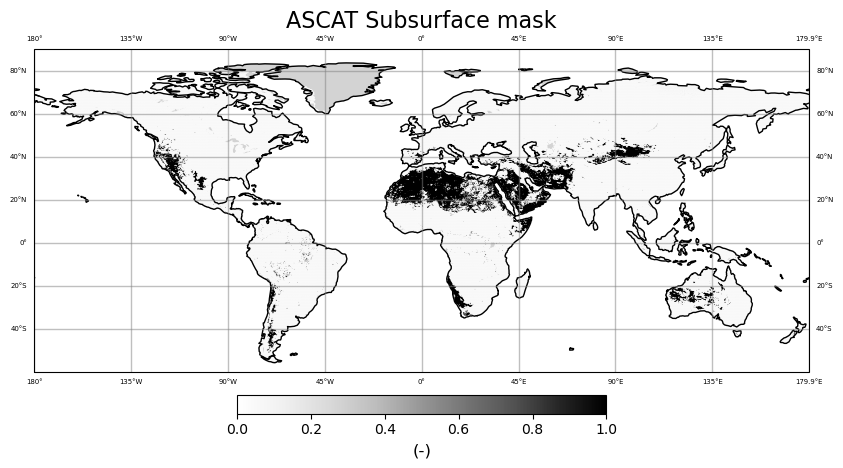

 Saving figure as ASCAT Combined mask.png 



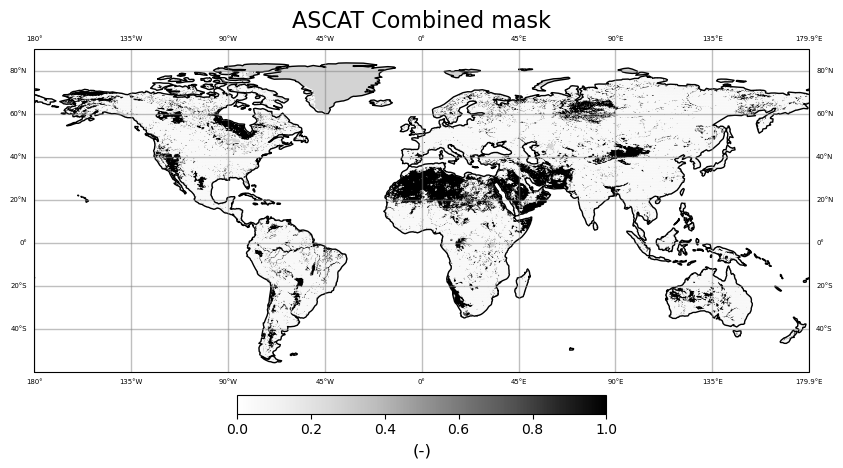

In [4]:
# Open two netcdf files and extract the mask variables and compare them

file_path = '/discover/nobackup/amfox/ASCAT_fname_lists/ascat_subsurface_mask_p1.nc'
mask_file = xr.open_dataset(file_path)
mask = mask_file['mask']
lon_mask = mask_file['lon']
lat_mask = mask_file['lat']

# Make lat and lon compatible with the mask
lon_2d, lat_2d = np.meshgrid(lon_mask, lat_mask)

# Flatten the lat and lon variables
lon_flat = lon_2d.flatten()
lat_flat = lat_2d.flatten()

file_path = '/discover/nobackup/amfox/ASCAT_fname_lists/ascat_combined_mask_p1.nc'
mask_file = xr.open_dataset(file_path)
mask2 = mask_file['mask']
lon_mask2 = mask_file['lon']
lat_mask2 = mask_file['lat']

mask_flat = mask.values.flatten()
mask_flat2 = mask2.values.flatten()

# Compare the two masks
mask_diff = mask_flat - mask_flat2

obarray = np.empty([len(mask_diff), 3])
obarray[:, 1] = lon_flat
obarray[:, 2] = lat_flat
obarray[:, 0] = mask_diff

plot_global_tight(obarray,True,'ASCAT Mask Difference','(-)')

obarray[:, 0] = mask_flat
plot_global_tight(obarray,True,'ASCAT Subsurface mask','(-)', 0, 1, cmap='Greys')

obarray[:, 0] = mask_flat2
plot_global_tight(obarray,True,'ASCAT Combined mask','(-)', 0, 1, cmap='Greys')

In [3]:
# make a copy of the mask_diff array and replace all the NaNs with 0s
mask_diff_copy = mask_flat.copy()
mask_diff_copy[np.isnan(mask_diff_copy)] = 0

# Count the number of non-zero elements in the mask_diff_copy array
num_non_zero = np.count_nonzero(mask_diff_copy)
print(f"Number of non-zero elements in mask_diff_copy: {num_non_zero}")

Number of non-zero elements in mask_diff_copy: 245727


In [4]:
# make a copy of the mask_diff array and replace all the NaNs with 0s
mask_diff_copy = mask_flat2.copy()
mask_diff_copy[np.isnan(mask_diff_copy)] = 0

# Count the number of non-zero elements in the mask_diff_copy array
num_non_zero = np.count_nonzero(mask_diff_copy)
print(f"Number of non-zero elements in mask_diff_copy: {num_non_zero}")

Number of non-zero elements in mask_diff_copy: 245873


In [5]:
# make a copy of the mask_diff array and replace all the NaNs with 0s
mask_diff_copy = mask_diff.copy()
mask_diff_copy[np.isnan(mask_diff_copy)] = 0

# Count the number of non-zero elements in the mask_diff_copy array
num_non_zero = np.count_nonzero(mask_diff_copy)
print(f"Number of non-zero elements in mask_diff_copy: {num_non_zero}")

Number of non-zero elements in mask_diff_copy: 72480
